## **1. Transformer - Architecture**  

A **Transformer** is a deep learning architecture designed to process sequential data efficiently using **Self-Attention** instead of recurrence (RNNs) or convolutions (CNNs). It is the foundation for models like **GPT, BERT, T5, LLaMA, ViT, and CLIP**.

---



### **🔹 Core Components of a Transformer**  

#### **1. Input Representation**
- **Token Embedding:** Converts words or subwords into numerical vectors.
- **Positional Encoding:** Adds position-related information to retain word order.

#### **2. Multi-Head Self-Attention**
- **Self-Attention** allows each token in a sequence to interact with every other token.
- **Multi-Head Attention** applies multiple attention layers in parallel, capturing diverse relationships.

#### **3. Feed-Forward Network (FFN)**
- Each attention layer is followed by a **fully connected feed-forward network** that applies non-linear transformations.

#### **4. Layer Normalization & Residual Connections**
- **Layer Normalization** stabilizes training and prevents exploding gradients.
- **Residual Connections** allow gradients to flow efficiently through deep networks.

---



### **🔹 High-Level Structure of a Transformer**  

The Transformer consists of **stacked layers of encoders and decoders** (or just decoders in some models like GPT).  

#### **1. Encoder-Decoder Framework**  
Used in models like **T5, BART**, it consists of:
- **Encoder:** Takes input tokens and generates **contextual representations**.
- **Decoder:** Uses these representations to generate output tokens step-by-step.  
- **Computation Flow:**
  1. Input tokens → **Embedded vectors**  
  2. Add **Positional Encoding**  
  3. Pass through **Multi-Head Self-Attention (Encoder)**  
  4. Processed through **Feed-Forward Network (FFN)**  
  5. Decoder attends to **both the encoder outputs + previous tokens**  
  6. Generates the next token **iteratively**  

---

#### **2. Decoder-Only Architecture**  
Used in **GPT models (GPT-3, GPT-4, LLaMA, Falcon, Mistral)**.  
- **Only the decoder is used** to generate text **without an encoder**.
- **Causal Self-Attention:** Prevents tokens from attending to future tokens.
- **Computation Flow:**
  1. Input prompt → **Embedded vectors**  
  2. Add **Positional Encoding**  
  3. Apply **Masked Multi-Head Self-Attention** (so it cannot see future words)  
  4. Pass through **Feed-Forward Network (FFN)**  
  5. Predict next token → Repeat  

---

#### **3. Encoder-Only Architecture**  
Used in models like **BERT, RoBERTa, ALBERT**, designed for **text understanding (not generation)**.  
- **Only the encoder is used** to create deep bidirectional representations.  
- **Great for classification, Q&A, and language understanding tasks.**  
- **Computation Flow:**
  1. Input sentence → **Token Embeddings**  
  2. Add **Positional Encoding**  
  3. Processed by **Multi-Head Self-Attention (Bidirectional)**  
  4. Pass through **Feed-Forward Network (FFN)**  
  5. Extract final embeddings for classification or semantic tasks.  

---



### **Detailed Steps of Computation**  

#### **Step 1: Input Representation**  
- Convert text into tokenized numerical form using a tokenizer (e.g., WordPiece for BERT).
- Each token is converted into an **embedding vector**.
- Add **Positional Encoding** to retain sequence order.

  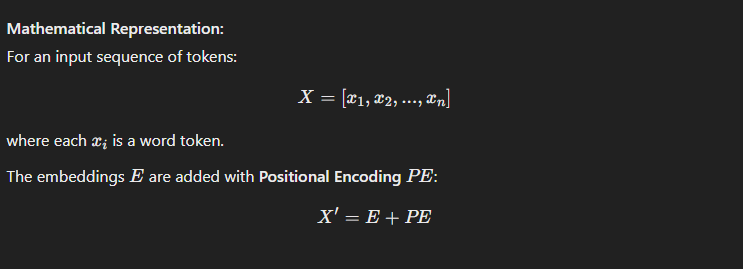

---

#### **Step 2: Multi-Head Self-Attention Computation**  
Each token interacts with all other tokens in the sequence using **Self-Attention**.

  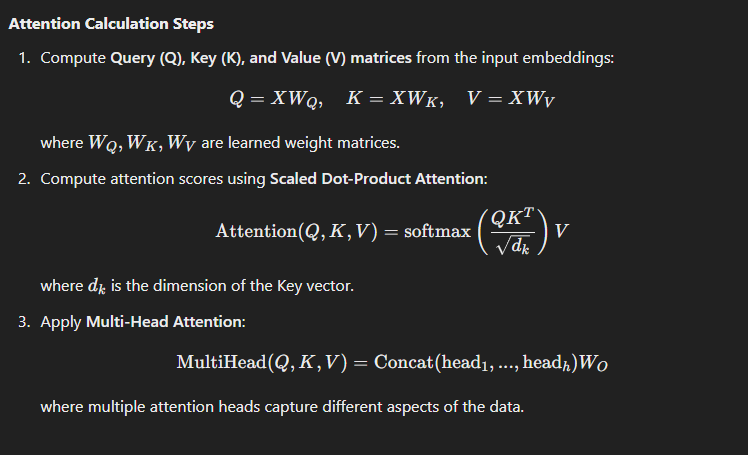

---

#### **Step 3: Feed-Forward Network (FFN)**
- A **fully connected layer** applied to the output of attention layers.
- Uses **non-linearity (ReLU/GELU activation)**.

    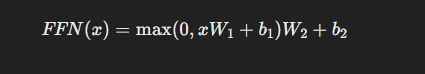


---

#### **Step 4: Layer Normalization & Residual Connections**
- **Layer Normalization:** Normalizes activations to stabilize learning.
- **Residual Connections:** Helps avoid vanishing gradients.

    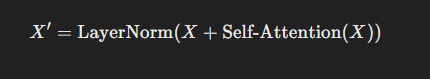
    
---



### **Final Computation Pipeline**  
For an **Encoder-Decoder Transformer**:  

1. **Encoder**  
   - Input tokens → Token Embedding + Positional Encoding  
   - Multi-Head Self-Attention  
   - Feed-Forward Network  
   - Layer Normalization  
   - Output: Contextualized token representations  

2. **Decoder**  
   - Input tokens + Encoder output  
   - Masked Multi-Head Self-Attention (prevents looking at future tokens)  
   - Cross-Attention (attends to Encoder output)  
   - Feed-Forward Network  
   - Layer Normalization  
   - Output: Next token probabilities  

---

### **Summary of Computation Steps**  

#### **1. Inputs**
✔ **Tokenized text (numerical form of words)**  
✔ **Positional encoding (adds word order information)**  

#### **2. Processing Steps**
✔ **Multi-Head Self-Attention** (computes Q, K, V, applies attention)  
✔ **Feed-Forward Network (FFN)** (fully connected layer with activation)  
✔ **Layer Normalization** (stabilizes learning)  
✔ **Residual Connections** (helps backpropagation)  

#### **3. Outputs**
✔ **Encoded representations (for understanding tasks like BERT)**  
✔ **Generated text (for generation tasks like GPT)**  

---


### **How the Attention Mechanism Makes Transformers Unique?**  

#### **🔹 What is Attention in Simple Terms?**  
- Imagine reading a **long sentence**. Instead of remembering **every single word**, you focus on the **most important words** that help you understand the meaning.  
- Transformers use **Self-Attention** to do the same thing: **pay more attention to relevant words and less to unnecessary ones**.  

---

#### **🔹 Why is Attention Important?**  
✅ **Looks at the Whole Sentence at Once** → Unlike RNNs, which process word by word.  
✅ **Finds Important Words** → Helps understand context better.  
✅ **Works for Long Sentences** → Can connect words from far apart.  
✅ **Parallel Processing** → Can analyze multiple words at the same time, making it much faster.  

---

#### **🔹 How Does Self-Attention Work? (Step-by-Step in Simple Words)**  

1️⃣ **Each word looks at all other words** in the sentence to decide which words are important.  
2️⃣ **Assigns a score** to every word based on how relevant it is.  
3️⃣ **Higher scores mean more focus**, lower scores mean less focus.  
4️⃣ **The model then combines the words with their scores** to understand the full meaning of the sentence.  

---

#### **🔹 Example: Understanding a Sentence with Self-Attention**  

**Sentence:**  
*"The cat sat on the mat because it was tired."*  

💡 **What does "it" refer to?**  
- RNNs/LSTMs might get confused since they read word by word.  
- Transformers **look at the whole sentence at once**, so they know **"it" refers to "the cat"**.  

✅ **Self-Attention helps the model recognize long-distance relationships between words!**  

---

#### **🔹 Why is Self-Attention Better than RNNs or CNNs?**  

| Feature | **RNN (LSTM/GRU)** | **CNN** | **Transformer (Self-Attention)** |
|---------|----------------|---------|----------------|
| **Processes Text** | One word at a time | Fixed-size local filters | Whole sentence at once |
| **Handles Long Sentences?** | ❌ Hard | ❌ Needs deep stacking | ✅ Easily |
| **Finds Important Words?** | ❌ Limited | ❌ Only nearby words | ✅ Yes, across the whole sentence |
| **Training Speed** | ❌ Slow | ✅ Fast | ✅ Super Fast (Parallel Processing) |



---
---

## **2. Do Transformers Use CNNs or RNNs?**  

❌ **No, Transformers Do NOT Use LSTMs or CNNs**  

✅ Instead of **recurrence (RNNs/LSTMs)** or **convolutions (CNNs)**, Transformers **rely on Self-Attention** to process input sequences.  

### **Why Transformers Do NOT Use LSTMs or CNNs?**  
1. **No Recurrence → Uses Self-Attention Instead**  
   - **LSTMs process text word-by-word**, making training slow.  
   - **Transformers process entire sequences at once** using **Self-Attention** → **much faster**.  

2. **No Convolutions → Uses Attention for Global Context**  
   - CNNs use **local filters** (3x3, 5x5) → limited to **local dependencies**.  
   - Transformers use **Self-Attention** → captures **global relationships** between all words.  

---



---
---

## **3. Transformer vs. CNN vs. RNN vs. FNN – Detailed Comparison**  

The table below provides a **comprehensive comparison** of different AI architectures, including **justifications for their strengths and weaknesses**.  

---



#### **🔹 Key Differences: Transformers vs. RNNs vs. CNNs vs. FNNs**  

  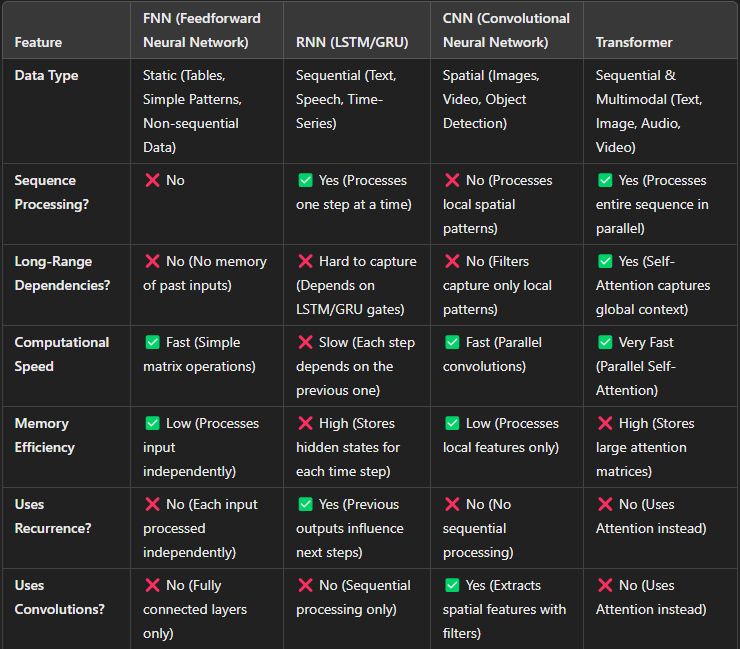

  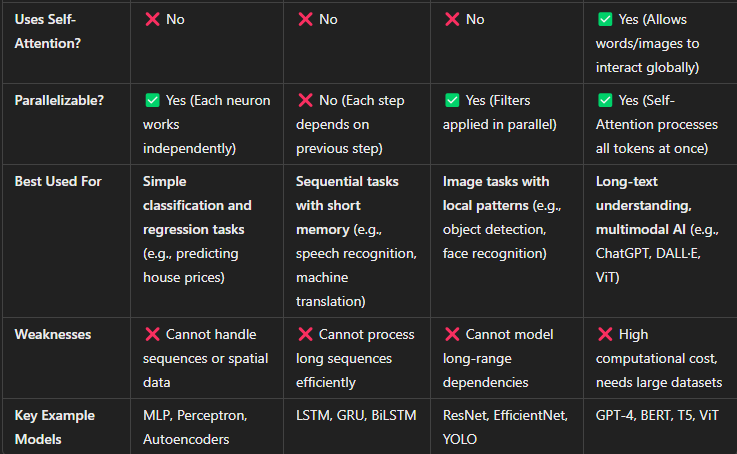

#### **🔹 Justifications for Key Differences**
##### **1️⃣ Why is Transformer Faster than RNN?**
- **RNN processes data sequentially** (word by word), making training slow.
- **Transformer processes all words at once** using **Self-Attention**, allowing **parallel computation on GPUs**.
- Example: **GPT-4 can generate text much faster than an LSTM-based chatbot.**

##### **2️⃣ Why Can’t CNNs Handle Long-Range Dependencies?**
- CNNs use **fixed-size filters** (e.g., 3x3, 5x5) to **detect local patterns**.
- They **lack a global view** of the input like Self-Attention in Transformers.
- Example: **CNNs can detect objects in an image but struggle with long-text dependencies like summarizing a book.**

##### **3️⃣ Why Are Transformers Expensive to Train?**
- **Self-Attention requires storing large weight matrices** for every token in a sequence.
- **Memory usage grows quadratically** with sequence length (O(n²) complexity).
- Example: **A Transformer processing 10,000 words requires far more computation than an RNN processing the same text.**

##### **4️⃣ Why Are RNNs Not Parallelizable?**
- Each step in an RNN depends on the **previous step** (hidden state), preventing parallel execution.
- Transformers don’t have this problem since **all tokens interact at once** in Self-Attention.
- Example: **Google Translate switched from LSTMs to Transformers for faster translations.**

##### **5️⃣ Why Are CNNs Still Used Instead of Transformers in Vision Tasks?**
- CNNs **use fewer parameters** and are **optimized for small datasets**.
- Vision Transformers (ViT) work best on **large-scale datasets** (e.g., ImageNet).
- Example: **Self-driving cars use CNNs for real-time object detection instead of Vision Transformers.**



---
---

## **4. How Does a Transformer Work Without CNNs or RNNs?**  

### **🔹 Techniques Used in Transformers**  
1. **Self-Attention Mechanism**  
   - Each word **attends to all other words** using **scaled dot-product attention**.  
   - **Replaces recurrence (RNNs) and local filters (CNNs)**.  

2. **Positional Encoding**  
   - Since Transformers **lack recurrence**, they use **Positional Encoding** to track word order.  

3. **Feed-Forward Neural Networks (FFN)**  
   - After Self-Attention, the output is **passed through a simple fully connected layer**.  



---
---

## **5. When Do CNNs or RNNs Outperform Transformers?**  

- While **Transformers have become the dominant AI architecture**, they are not always the best choice.
- **RNNs (LSTMs/GRUs) and CNNs** still **outperform Transformers** in specific use cases due to efficiency, lower data requirements, and computational constraints.  

---



### **🔹 Practicality of Using CNNs or RNNs Over Transformers**  




#### ✅ **RNNs (LSTMs/GRUs) Are Still Used When:**  
📌 **1. Low-Data Scenarios**  
- **Transformers require massive datasets** to generalize well (e.g., GPT-4 is trained on billions of tokens).  
- **LSTMs can work with smaller datasets** because they rely on recurrence rather than attention across all tokens.  
- **Example:** If a business has only **a few hundred** customer reviews, training a Transformer would be inefficient.  

📌 **2. Time-Series Forecasting (Stock Market, Weather, Sensor Data)**  
- **Time-series data has inherent temporal dependencies** → RNNs process sequential data naturally.  
- **Transformers struggle with time-series data** unless specifically adapted (e.g., Time-Series Transformers).  
- **Example:** **LSTMs are widely used in finance** for **predicting stock trends** or **forecasting energy consumption**.  

📌 **3. Embedded Systems (Smartphones, IoT, Edge Devices)**  
- RNNs (especially **GRUs**) require **less memory** than Transformers.  
- Transformers need **parallel GPU computation**, while RNNs can run **efficiently on CPUs**.  
- **Example:** AI-powered **speech recognition on smartwatches** (Apple Watch's Siri uses an optimized RNN).  

📌 **4. Real-Time Speech Recognition (Low-Latency Applications)**  
- LSTMs process speech **efficiently in real-time**, whereas Transformers require more computation.  
- **Example:** **Google's speech-to-text in Android uses an LSTM-based model** instead of a Transformer due to **power constraints**.  

📌 **5. Anomaly Detection (Credit Card Fraud, Cybersecurity)**  
- **Recurrent models are good at detecting anomalies over time** in logs, network traffic, or financial transactions.  
- **Example:** **Banks use LSTMs to track suspicious patterns** in credit card usage.  

---



#### ✅ **CNNs Are Still Used When:**  

📌 **1. Real-Time Vision Tasks (Self-Driving Cars, Face Recognition, Object Detection)**  
- CNNs process images **efficiently and quickly** using **convolutional filters**.  
- Transformers (ViT) **require large datasets and more computational resources**, making them slower in real-time.  
- **Example:** **Self-driving cars (Tesla, Waymo) still use CNN-based models** for **real-time object detection**.  

📌 **2. Small Dataset Problems (Medical Imaging, X-Ray Analysis)**  
- CNNs have **built-in spatial hierarchies** → They perform well **even with limited data**.  
- Transformers require **pretraining on massive datasets** like ImageNet before fine-tuning.  
- **Example:** **Medical AI for X-ray classification** (e.g., pneumonia detection) uses **CNNs like EfficientNet** instead of ViTs.  

📌 **3. Feature Extraction in Vision (ResNet, YOLO, MobileNet)**  
- CNNs **extract hierarchical features** efficiently.  
- Vision Transformers **require expensive patch embeddings**, making them computationally expensive.  
- **Example:** **YOLO (You Only Look Once) is widely used in security cameras** for real-time object tracking.  

📌 **4. Hardware Constraints (Drones, Autonomous Robots, Edge AI)**  
- CNNs are optimized for **low-power devices** and work **efficiently on mobile GPUs or TPUs**.  
- Transformers require **high-end GPUs with large memory**.  
- **Example:** **Drones use CNNs for obstacle detection and tracking** due to their **low power consumption**.  

📌 **5. Image Compression & Super-Resolution (Mobile AI Applications)**  
- CNNs work well for **image compression, upscaling, and enhancement**.  
- **Example:** **AI-powered smartphone camera enhancements** (Google Pixel’s Night Mode) use **CNN-based models like SRGAN (Super-Resolution GAN)**.  

---



#### ❌ **Transformers Require High Computing Power → Not Ideal for Edge Devices**
- **Transformers need powerful GPUs/TPUs** due to **Self-Attention’s high memory and compute requirements**.  
- CNNs and RNNs **are more efficient for low-power applications**.  
- **Example:** **IoT devices like smart home assistants use optimized CNNs or RNNs** instead of Transformers to **conserve battery life**.  

---

#### ✅ **Hybrid Models Exist (CNN-Transformer, RNN-Transformer Hybrids)**  
To combine the best of both worlds, hybrid architectures are being developed:  

**🔹 Conformer (Google) →** **Combines CNNs + Transformers for speech recognition**.  
**🔹 Perceiver (DeepMind) →** **Processes multimodal data (text, image, audio) more efficiently**.  
**🔹 ConvBERT →** **Uses CNNs for feature extraction + Transformers for attention** in NLP.  

---



### **🔹 Summary: When to Choose CNNs or RNNs Over Transformers**  

| **Use Case** | **Best Choice** | **Why?** |
|-------------|----------------|----------------------|
| **Stock Market Prediction** | ✅ **RNN (LSTM/GRU)** | RNNs handle time-series dependencies well. |
| **Real-Time Object Detection (Drones, Cars, Security)** | ✅ **CNN (YOLO, ResNet)** | CNNs are optimized for fast image processing. |
| **Medical Image Analysis (X-rays, MRI scans)** | ✅ **CNN (EfficientNet, VGG)** | CNNs work well on small datasets. |
| **Speech Recognition on Smartphones** | ✅ **RNN (LSTM-based models)** | RNNs are lightweight and efficient. |
| **AI-Powered Camera Filters (Super-Resolution, Denoising)** | ✅ **CNN (SRGAN, MobileNet)** | CNNs enhance images efficiently. |
| **Financial Fraud Detection (Credit Cards, Banking)** | ✅ **RNN (LSTM)** | RNNs detect anomalies in transaction sequences. |
| **Text Translation & Summarization** | ✅ **Transformer (T5, GPT)** | Transformers capture long-range dependencies. |
| **Multimodal AI (Image + Text, Audio + Video)** | ✅ **Transformer (CLIP, DALL·E, Gemini)** | Transformers handle multiple input types well. |


----
----

## **6. CNN vs. Transformer for Image Processing**  

| Feature | **CNN (Convolutional Neural Network)** | **Transformer (Vision Transformer - ViT)** |
|---------|------------------------------------|-----------------------------------|
| **Core Mechanism** | Local feature extraction (filters) | Global attention (Self-Attention) |
| **Captures Spatial Information?** | ✅ Yes | ✅ Yes (Positional Encoding) |
| **Long-Range Dependencies?** | ❌ No | ✅ Yes (Self-Attention) |
| **Computational Cost** | ✅ Low | ❌ High (Requires large datasets) |
| **Parallelization** | ❌ No | ✅ Yes |
| **Best Use Case** | Small/medium datasets, real-time AI | Large datasets, high-performance vision tasks |

---



## **7. CNN vs. RNN vs. Transformer - When to Use What?**  

| **Use Case** | **Best Architecture** | **Why?** |
|-------------|----------------|----------------------|
| **Text Classification** | Transformer (BERT) | Captures global context |
| **Speech Recognition** | RNN (LSTM/Conformer) | Good for sequence data |
| **Real-time Image Processing** | CNN (MobileNet, ResNet) | Low latency, efficient |
| **Image Generation** | Transformer (DALL·E, Stable Diffusion) | Learns long-range dependencies |
| **Stock Market Prediction** | RNN (LSTM) | Captures time dependencies |
| **Large-scale NLP Tasks** | Transformer (GPT, LLaMA) | Handles long sequences efficiently |
